In [9]:
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
import seaborn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [3]:
# Load data sets
dataset_red = read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', delimiter=';')
dataset_white = read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', delimiter=';')

# Peek at data sets
print(dataset_red.head())
print(dataset_white.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

<AxesSubplot:>

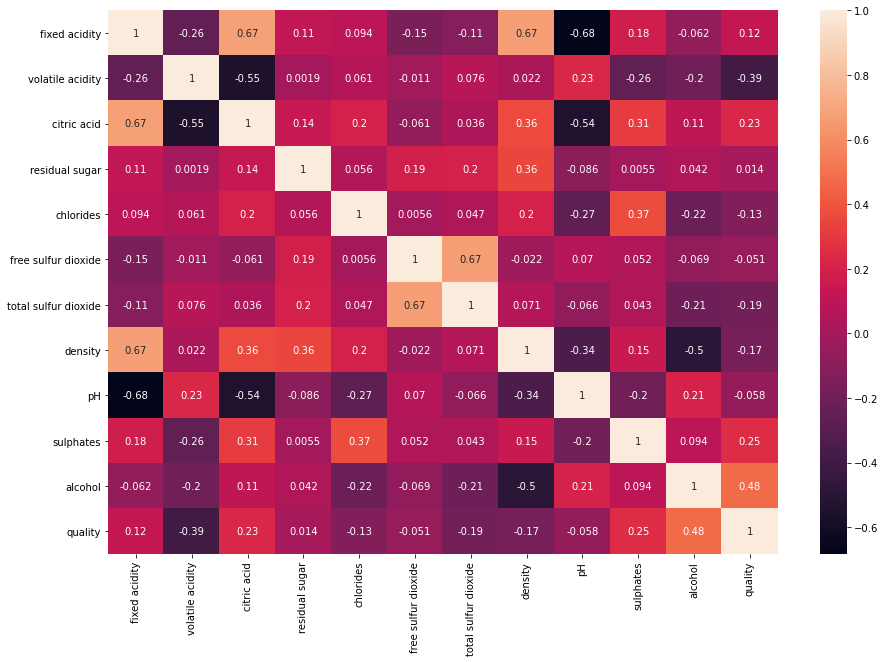

In [8]:
# Plot out the red data set
# for col in dataset_red.columns:
#     dataset_red.hist(column=col)
#     pyplot.show()

corr = dataset_red.corr()
pyplot.subplots(figsize=(15,10))
seaborn.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

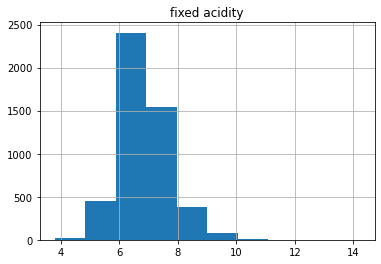

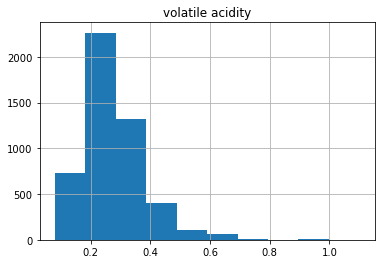

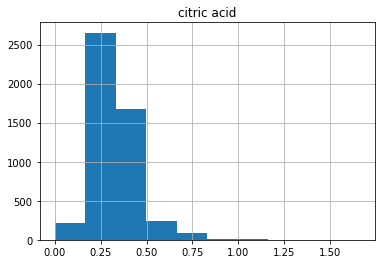

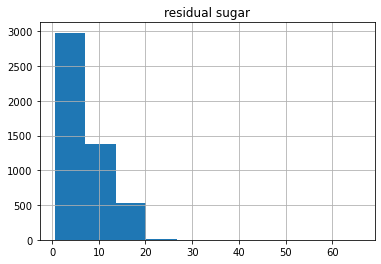

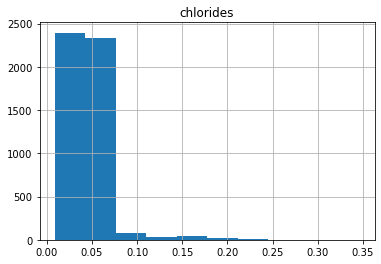

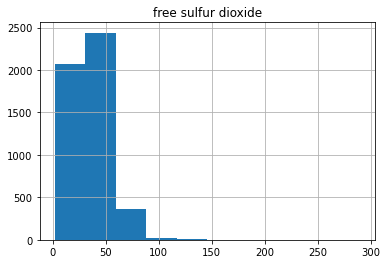

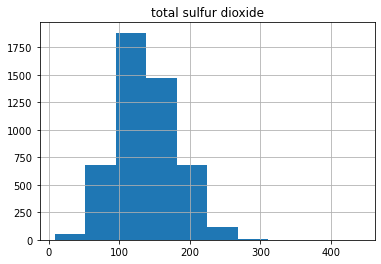

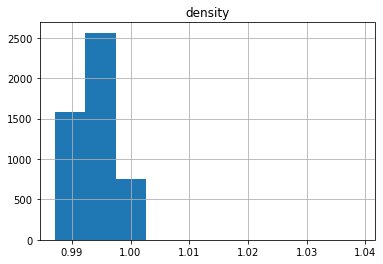

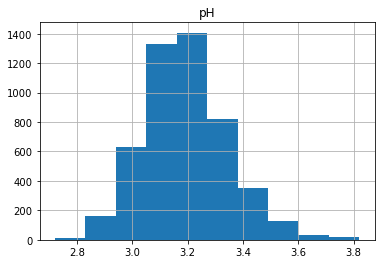

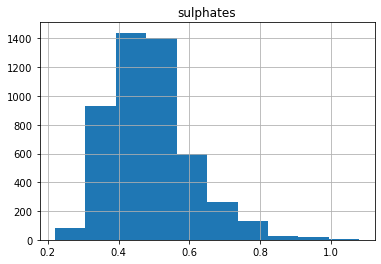

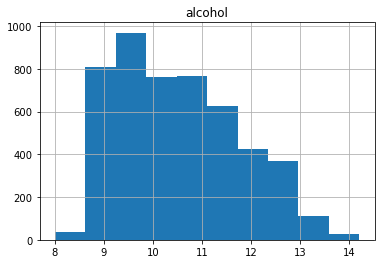

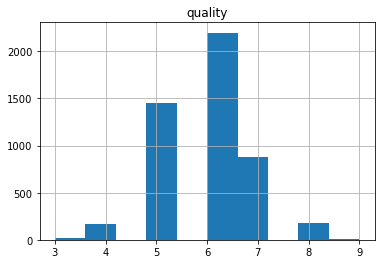

<AxesSubplot:>

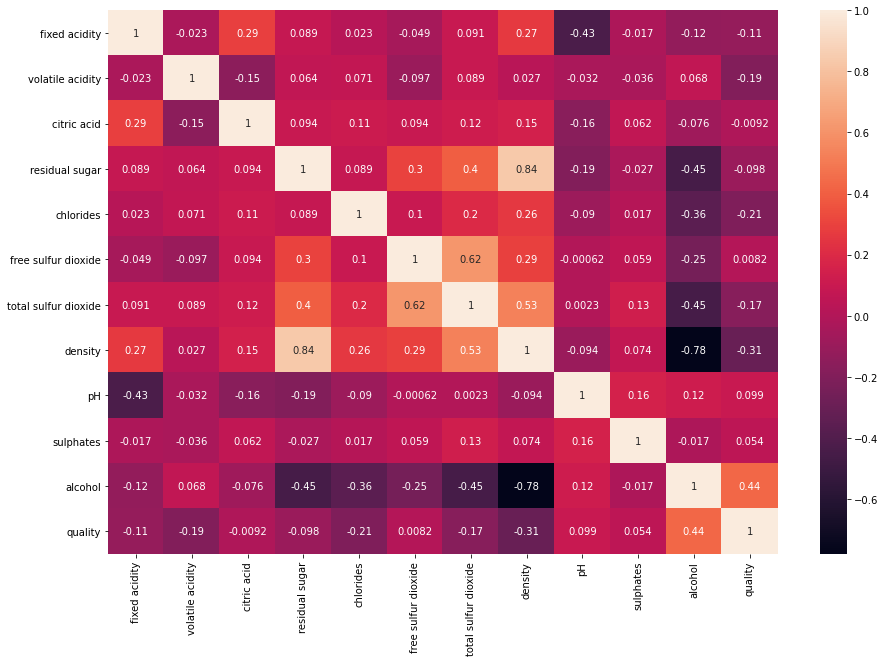

In [7]:
# Plot out the white data set
for col in dataset_white.columns:
    dataset_white.hist(column=col)
    pyplot.show()

corr = dataset_white.corr()
pyplot.subplots(figsize=(15,10))
seaborn.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

In [12]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

In [23]:
# Focusing on the red dataset
# Create a validation dataset
# Split data 80/20, test/validation
X = dataset_red.values[:,:-1] #split off the data
y = dataset_red.values[:,-1] #split off the classification data

X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1) # Split into test/validation data

# Iterate through some different models to see what works
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

results = []
names = []
for name, model in models:
    cv_results = cross_val_score(model, X_train, Y_train, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    
# These results are pretty medicore.
# 1. Data is not normalized
# 2. We are scoring, not classifying, with classifying algos. 

LR: 0.578572 (0.035800)
LDA: 0.595775 (0.041554)
KNN: 0.505885 (0.023855)
CART: 0.584063 (0.015801)
NB: 0.530898 (0.020792)
SVM: 0.557488 (0.021032)


In [26]:
# Let's improve our results by normalizing the data.

X = dataset_red.values[:,:-1] 
X = StandardScaler().fit_transform(X)
y = dataset_red.values[:,-1] 

X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1) 

# Iterate through some different models to see what works
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

results_normalized = []
names_normalized = []
for name, model in models:
    cv_results = cross_val_score(model, X_train, Y_train, scoring='accuracy')
    results_normalized.append(cv_results)
    names_normalized.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

# So let's compare, it looks like we had a decent improvement in most of the methods. 
# Let's try adding some classes to the quality scores. 

LR: 0.588744 (0.036054)
LDA: 0.595775 (0.041554)
KNN: 0.559035 (0.010963)
CART: 0.588744 (0.010475)
NB: 0.532460 (0.019548)
SVM: 0.623150 (0.033491)


In [54]:
# Let's improve our results by classifying the quality column into some thing like "OK, Good and Great".
# Using DataFrame.describe() we can look at the data for quality and split semi-arbitrarily 
# Great >= 6.5, Good, OK <= 4.5
dataset_red['quality_rank'] = ['Great' if x >= 6.5 else 'OK' if x <= 4.5 else 'Good' for x in dataset_red['quality']]
#dataset_red['quality_rank'].groupby(dataset_red['quality_rank']).hist()


X = dataset_red.values[:,:-1] 
X = StandardScaler().fit_transform(X)
y = dataset_red.values[:,-1] 

X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1) 

# Iterate through some different models to see what works
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

results_categorized = []
names_categorized = []
for name, model in models:
    cv_results = cross_val_score(model, X_train, Y_train, scoring='accuracy')
    results_categorized.append(cv_results)
    names_categorized.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

# Now that is a good increase. Perhaps a little too good, espsecially for the Decision Tree.

LR: 0.966385 (0.003950)
LDA: 0.996872 (0.001564)
KNN: 0.936676 (0.008298)
CART: 1.000000 (0.000000)
NB: 0.979675 (0.013391)
SVM: 0.988269 (0.005533)


In [56]:
# Let's go ahead and pick the SVM model and see what we get
model = SVC(gamma='auto') #Select SVM 
model.fit(X_train, Y_train) #Fit training values to training classification
predictions = model.predict(X_validation) #apply the model to the validation values

# Evaluate the predictions
print(accuracy_score(Y_validation, predictions)) #accuracy is greater than 95%
print(confusion_matrix(Y_validation, predictions)) #
print(classification_report(Y_validation, predictions))

0.990625
[[274   0   0]
 [  1  31   0]
 [  2   0  12]]
              precision    recall  f1-score   support

        Good       0.99      1.00      0.99       274
       Great       1.00      0.97      0.98        32
          OK       1.00      0.86      0.92        14

    accuracy                           0.99       320
   macro avg       1.00      0.94      0.97       320
weighted avg       0.99      0.99      0.99       320



In [60]:
# Let's use the model on the white wine data and see if we get anything different.
dataset_white['quality_rank'] = ['Great' if x >= 6.5 else 'OK' if x <= 4.5 else 'Good' for x in dataset_white['quality']]

X = dataset_white.values[:,:-1] 
X = StandardScaler().fit_transform(X)
y = dataset_white.values[:,-1]

predictions = model.predict(X) #apply the model to the validation values

# Evaluate the predictions
print(accuracy_score(y, predictions)) #accuracy is greater than 95%
print(confusion_matrix(y, predictions)) #
print(classification_report(y, predictions))

0.95406288280931
[[3655    0    0]
 [ 166  894    0]
 [  59    0  124]]
              precision    recall  f1-score   support

        Good       0.94      1.00      0.97      3655
       Great       1.00      0.84      0.92      1060
          OK       1.00      0.68      0.81       183

    accuracy                           0.95      4898
   macro avg       0.98      0.84      0.90      4898
weighted avg       0.96      0.95      0.95      4898

